<a href="https://colab.research.google.com/github/aufawibowo/lstm-under-different-stability/blob/master/Notebook_ARIMA_CSI_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-work

## Load libraries

In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## Data source

In [0]:
input_file = [  "/content/drive/My Drive/tugas akhir/SZSE 200 Historical Data.csv",
                "/content/drive/My Drive/tugas akhir/SZSE 300 Price Historical Data.csv",
                "/content/drive/My Drive/tugas akhir/Shanghai Shenzhen CSI 300 Historical Data.csv" ]
input_file = input_file[2]

## Load dataset

In [95]:
# load the dataset
df = pd.read_csv(input_file, header=0, index_col=None, delimiter=',')
df.head()

,Date,Open,High,Low,Price,Adj. close,Vol.,Change %
0,28-Feb-20,3988.73,4031.15,3928.07,3940.05,NaN,230.28K,-3.55%
1,27-Feb-20,4084.08,4110.51,4067.44,4084.88,NaN,181.29K,0.29%
2,26-Feb-20,4070.10,4132.78,4061.12,4073.02,NaN,261.09K,-1.23%
3,25-Feb-20,4066.30,4126.71,4020.91,4123.85,NaN,244.17K,-0.22%
4,24-Feb-20,4131.84,4149.01,4097.18,4132.84,NaN,212.87K,-0.40%


In [96]:
print(df.head())
print(df.shape)
print(df.columns)
print(len(df))

        Date     Open     High      Low    Price  Adj. close     Vol. Change %
0  28-Feb-20  3988.73  4031.15  3928.07  3940.05         NaN  230.28K   -3.55%
1  27-Feb-20  4084.08  4110.51  4067.44  4084.88         NaN  181.29K    0.29%
2  26-Feb-20  4070.10  4132.78  4061.12  4073.02         NaN  261.09K   -1.23%
3  25-Feb-20  4066.30  4126.71  4020.91  4123.85         NaN  244.17K   -0.22%
4  24-Feb-20  4131.84  4149.01  4097.18  4132.84         NaN  212.87K   -0.40%
(1011, 8)
Index(['Date', 'Open', 'High', 'Low', 'Price', 'Adj. close', 'Vol.',
       'Change %'],
      dtype='object')
1011


## Explanatory Data Analysis 

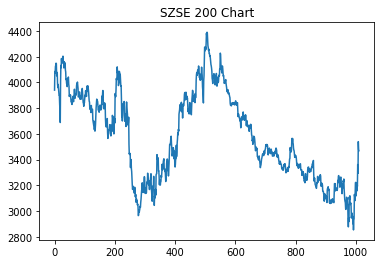

In [97]:
df['Price'].plot()
plt.title("SZSE 200 Chart")
plt.show()

Text(0.5, 1.0, 'SZSE 200 Cumulative Return')

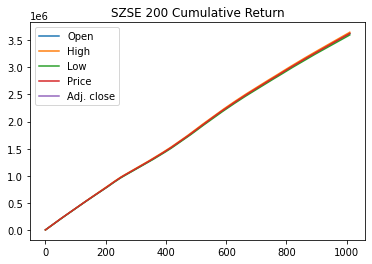

In [98]:
dr = df.cumsum()
dr.plot()
plt.title('SZSE 200 Cumulative Return')

Text(0.5, 1.0, 'SZSE 200 Autocorrelation')

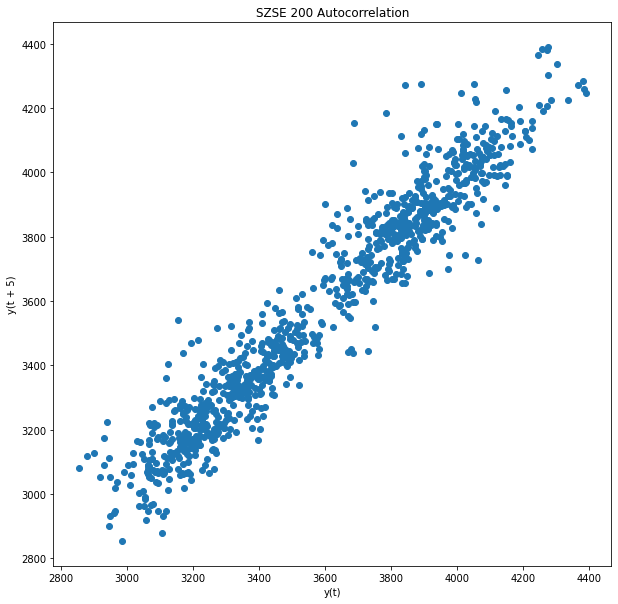

In [99]:
plt.figure(figsize=(10,10))
lag_plot(df['Price'], lag=5)
plt.title('SZSE 200 Autocorrelation')

# ARIMA

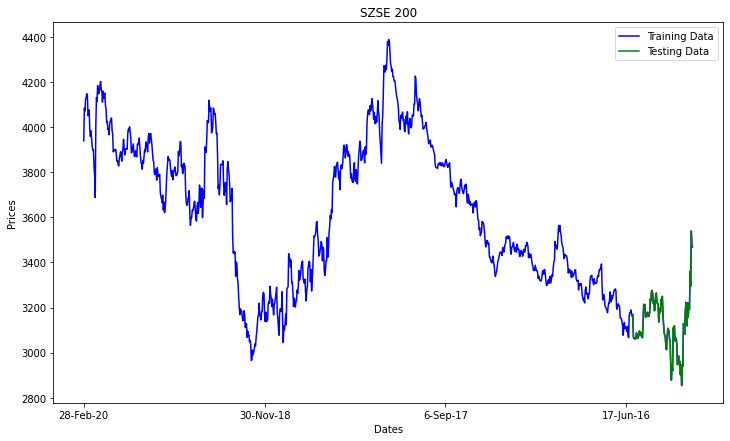

In [100]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(12,7))
plt.title('SZSE 200')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Price'], 'blue', label='Training Data')
plt.plot(test_data['Price'], 'green', label='Testing Data')
plt.xticks(np.arange(0,len(df), 300), df['Date'][0:len(df):300])
plt.legend()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [102]:

train_ar = train_data['Price'].values
test_ar = test_data['Price'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %f' % error2)

<class 'list'>
Testing Mean Squared Error: 3452.225708
Symmetric mean absolute percentage error: 4.082233


In [103]:
len(predictions)

102

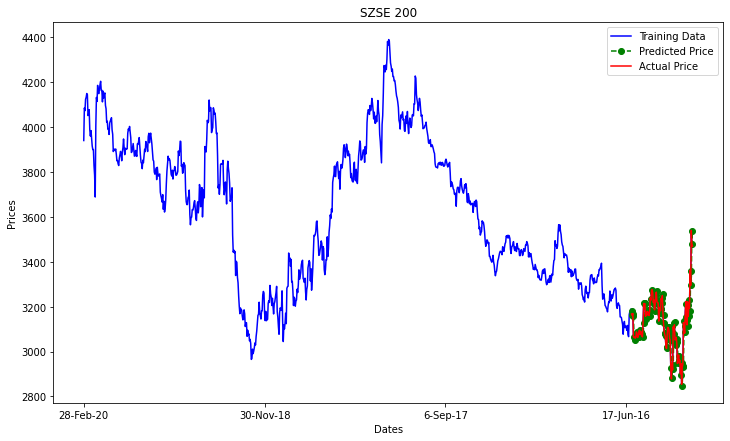

In [104]:
plt.figure(figsize=(12,7))
plt.plot(df['Price'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Price'], color='red', label='Actual Price')
plt.title('SZSE 200')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df), 300), df['Date'][0:len(df):300])
plt.legend()

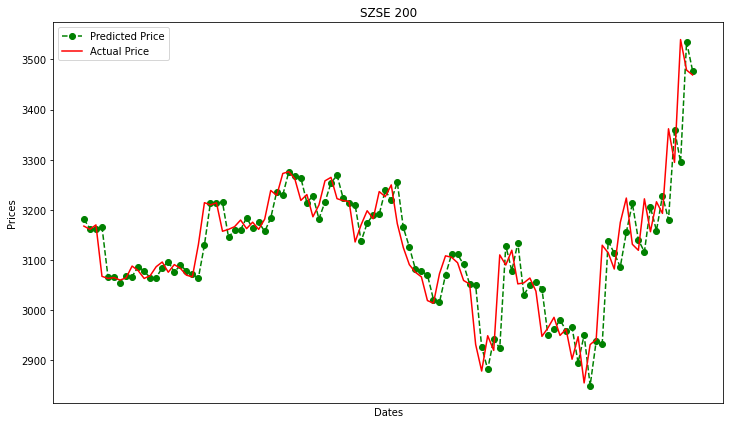

In [105]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Price'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,len(df), 60), df['Date'][1486:len(df):60])
plt.title('SZSE 200')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()